In [1]:
# Kütüphanelerin yüklenmesi

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("olimpiyatlar.csv") # Veri setinin yüklenmesi.
df = data.copy() # Veri setinin df'e kopyalanması.

"""
Veride nan değerler var, çıkart veya doldur.
Games column'u gereksiz, dropla.
Madalya kısımındaki nan gözlemleri kayıp veri değil. Madalya alamamış olarak doldur.
Ülke kısaltması veya takım gereksiz dropla.
"""

"\nVeride nan değerler var, çıkart veya doldur.\nGames column'u gereksiz, dropla.\nMadalya kısımındaki nan gözlemleri kayıp veri değil. Madalya alamamış olarak doldur.\nÜlke kısaltması veya takım gereksiz dropla.\n"

In [3]:
# İlk 5 gözlem
print(df.head())
print("- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -")

# Son 5 gözlem
print(df.tail())
print("- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -")

# Sütun isimleri
print(df.columns)
print("- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -")

# Değişken özellikleri
print(df.info())
print("- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -")

# Sayısal değişkenlerin istatistikleri
print(df.describe().T)
print("- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -")

# Boş değerlerin sayısı
print(df.isnull().sum())

"""
Yaş değişkenini int çevir.
Medal     231333
Age         9474
Height     60171
Weight     62875 boş değerleri var bunları doldur veya dropla.
"""

   ID                      Name Sex   Age  Height  Weight            Team  \
0   1                 A Dijiang   M  24.0   180.0    80.0           China   
1   2                  A Lamusi   M  23.0   170.0    60.0           China   
2   3       Gunnar Nielsen Aaby   M  24.0     NaN     NaN         Denmark   
3   4      Edgar Lindenau Aabye   M  34.0     NaN     NaN  Denmark/Sweden   
4   5  Christine Jacoba Aaftink   F  21.0   185.0    82.0     Netherlands   

   NOC        Games  Year  Season       City          Sport  \
0  CHN  1992 Summer  1992  Summer  Barcelona     Basketball   
1  CHN  2012 Summer  2012  Summer     London           Judo   
2  DEN  1920 Summer  1920  Summer  Antwerpen       Football   
3  DEN  1900 Summer  1900  Summer      Paris     Tug-Of-War   
4  NED  1988 Winter  1988  Winter    Calgary  Speed Skating   

                              Event Medal  
0       Basketball Men's Basketball   NaN  
1      Judo Men's Extra-Lightweight   NaN  
2           Football Men's

'\nYaş değişkenini int çevir.\nMedal     231333\nAge         9474\nHeight     60171\nWeight     62875 boş değerleri var bunları doldur veya dropla.\n'

In [4]:
# Değişken isimlerinin yeniden isimlendirilmesi.
df.rename(columns={'ID': 'id',
                   'Name': 'isim',
                   'Sex': 'cinsiyet',
                   'Age': 'yas',
                   'Height': 'boy',
                   'Weight': 'kilo',
                   'Team': 'takim',
                   'NOC': 'uok',
                   'Games': 'oyunlar',
                   'Year': 'yil',
                   'Season': 'sezon',
                   'City': 'sehir',
                   'Sport': 'spor',
                   'Event': 'etkinlik',
                   'Medal': 'madalya'
                   }, inplace = True)

# Gereksiz sütunların droplanması.
df = df.drop(columns=["oyunlar"], axis=1)

In [5]:
df.duplicated().value_counts() # Duplicate veriler mevcut.

False    269731
True       1385
Name: count, dtype: int64

,count,mean,std,min,25%,50%,75%,max
id,271116.0,68248.954396,39022.286345,1.0,34643.0,68205.0,102097.25,135571.0
yas,261642.0,25.556898,6.393561,10.0,21.0,24.0,28.00,97.0
boy,210945.0,175.338970,10.518462,127.0,168.0,175.0,183.00,226.0
kilo,208241.0,70.702393,14.348020,25.0,60.0,70.0,79.00,214.0
yil,271116.0,1978.378480,29.877632,1896.0,1960.0,1988.0,2002.00,2016.0


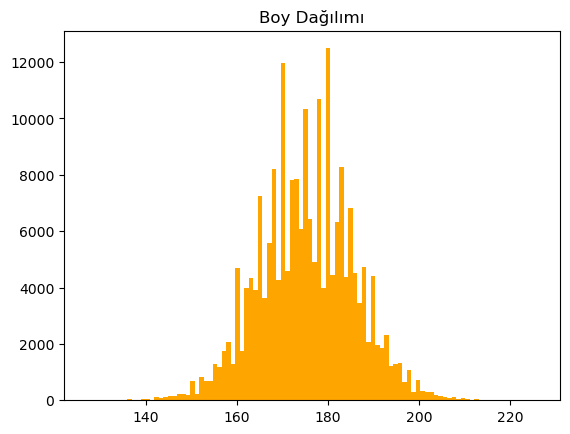

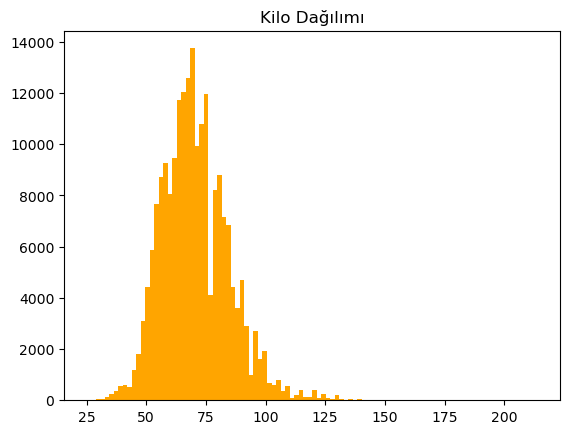

In [6]:
"""
Kayıp Veri Problemi:

Madalya alamayan sporcuları veri setinden çıkartalım.

Boy ve kilo sütununda bulunan kayıp verileri dolduralım.(Etkinlik ile dordurulacak)
Fakat etkinliğin medyanına mı ortalamasına göre mi alacağını kontrol etmemiz gerekiyor.

"""
plt.figure()
plt.hist(df["boy"], bins = 100, color = "orange")
plt.title("Boy Dağılımı")

plt.figure()
plt.hist(df["kilo"], bins = 100, color = "orange")
plt.title("Kilo Dağılımı")

df.describe().T

In [7]:
# Etkinlik durumuna göre boy ve kilo boş değerlerinin doldurulması.

cols = ["boy", "kilo"]

for col in cols:
    df[col] = df.groupby("etkinlik")[col].transform(lambda x: x.fillna(x.mean()))

Text(0.5, 1.0, 'Yaş Dağılımı')

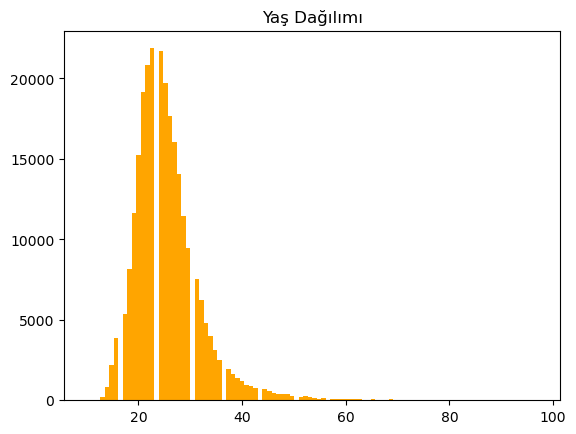

In [8]:
# Yaş dağılımının görselleştirilmesi

plt.figure()
plt.hist(df["yas"], bins = 100, color="orange")
plt.title("Yaş Dağılımı")

In [9]:
# Yas sütunundaki eksik değerleri cinsiyet ve spora göre doldurulması

df["yas"] = df.groupby(["cinsiyet", "spor"])["yas"].transform(lambda x: x.fillna(x.mean()))

# Madalya alamayan sporcuların (NaN) droplanması

df = df.dropna(subset=["madalya"])

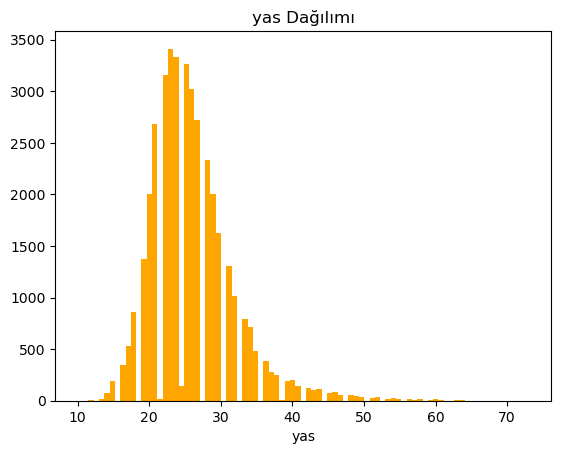

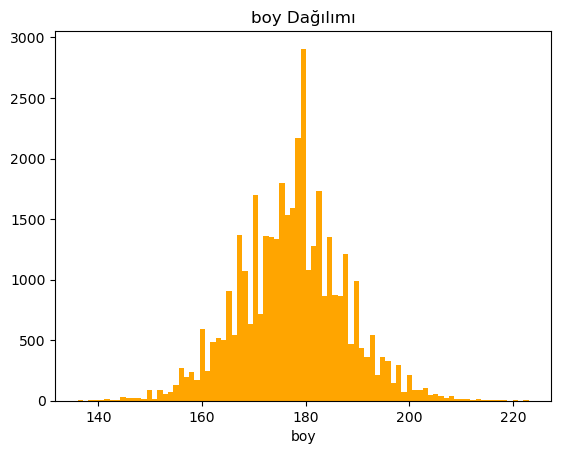

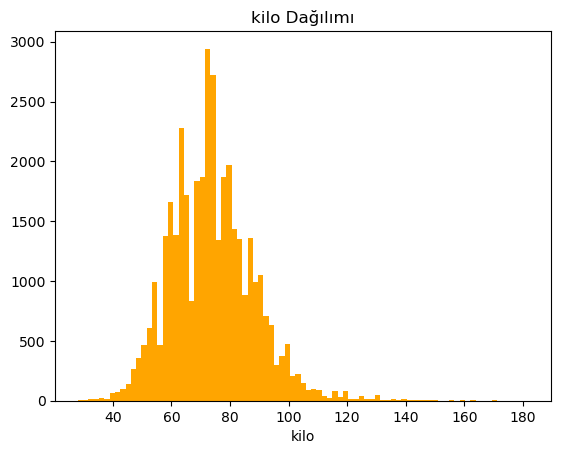

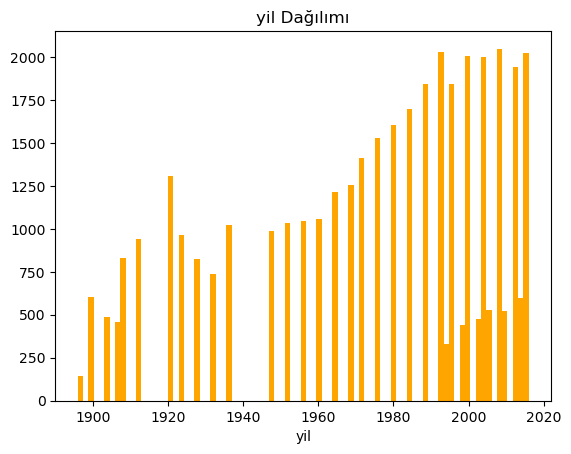

In [10]:
# Tek değişkenli veri analizi

def plotHist(degisken, bins_count, renk):
    plt.figure()
    plt.hist(df[degisken], bins = bins_count, color = renk)
    plt.xlabel(degisken)
    plt.title(f'{degisken} Dağılımı')
    plt.show()

num_feature = ["yas", "boy", "kilo", "yil"]

for col in num_feature:
    plotHist(col, 85, 'orange')

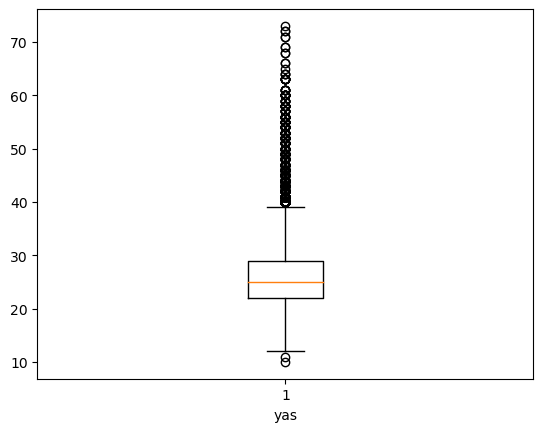

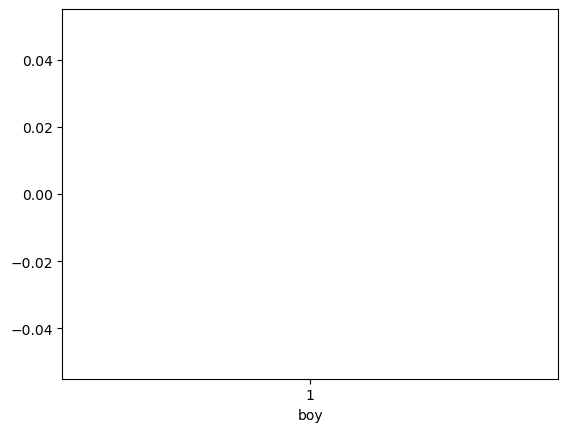

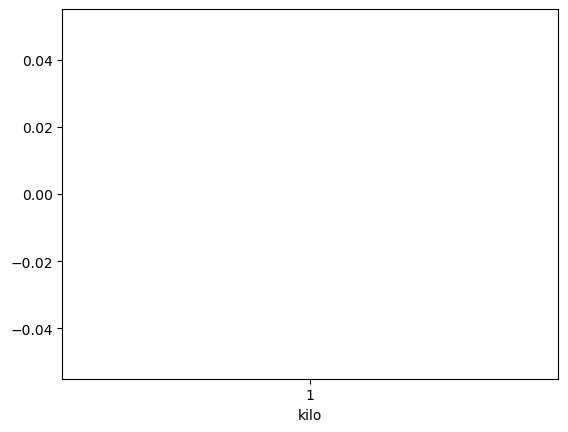

In [11]:
def plotBox(degisken):
    plt.figure()
    plt.boxplot(df[degisken])
    plt.xlabel(degisken)
    plt.show()

num_feature = ["yas", "boy", "kilo"]
for col in num_feature:
    plotBox(col)

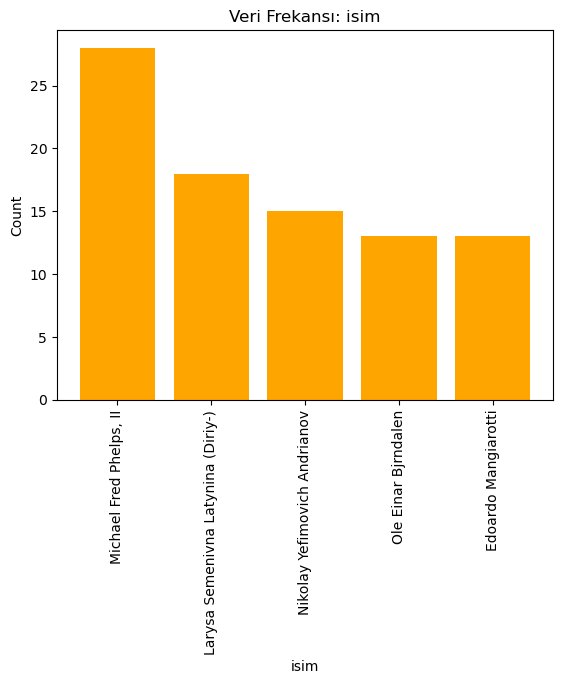

isim Değişkeni: 
isim
Michael Fred Phelps, II               28
Larysa Semenivna Latynina (Diriy-)    18
Nikolay Yefimovich Andrianov          15
Ole Einar Bjrndalen                   13
Edoardo Mangiarotti                   13
Name: count, dtype: int64


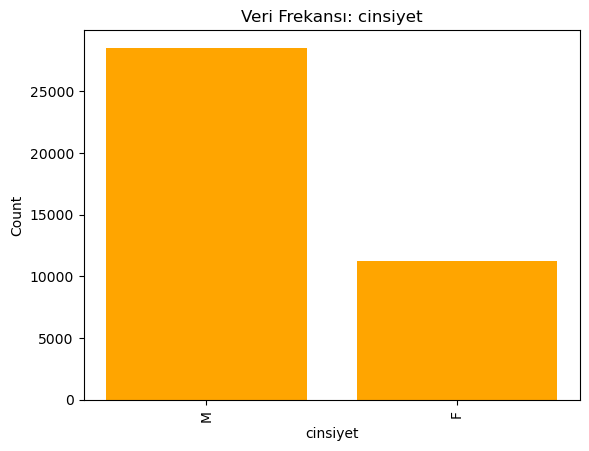

cinsiyet Değişkeni: 
cinsiyet
M    28530
F    11253
Name: count, dtype: int64


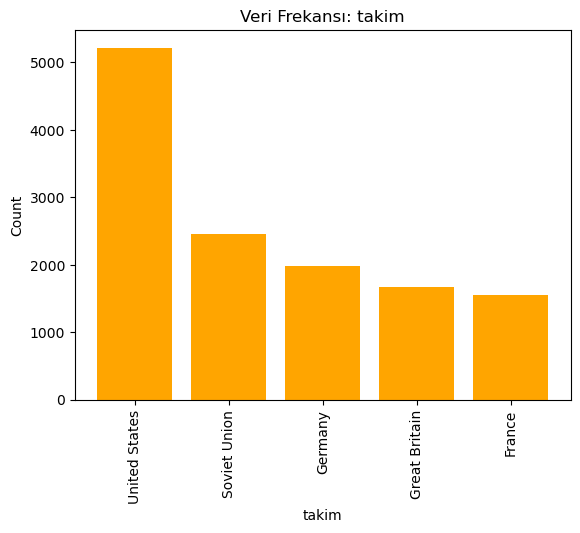

takim Değişkeni: 
takim
United States    5219
Soviet Union     2451
Germany          1984
Great Britain    1673
France           1550
Name: count, dtype: int64


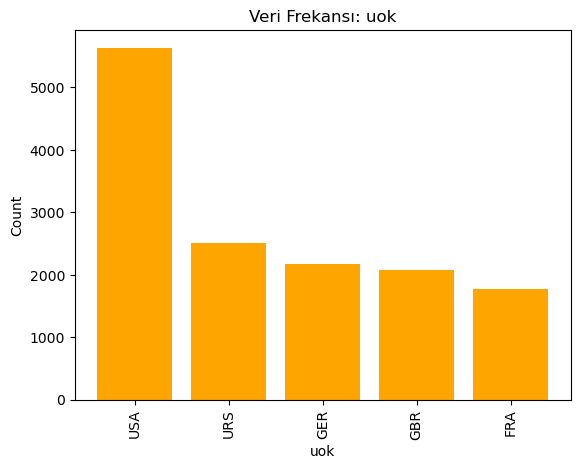

uok Değişkeni: 
uok
USA    5637
URS    2503
GER    2165
GBR    2068
FRA    1777
Name: count, dtype: int64


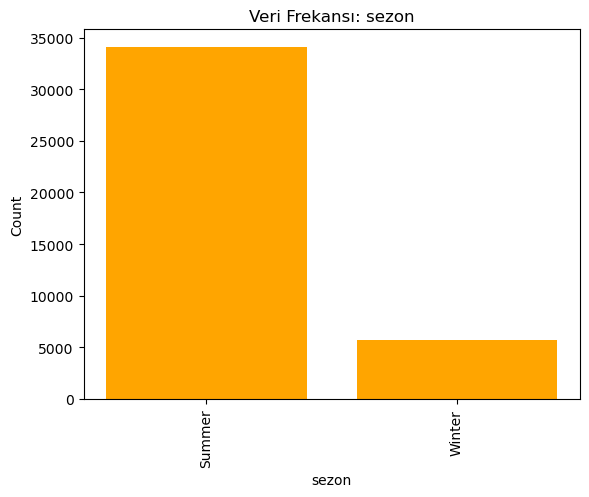

sezon Değişkeni: 
sezon
Summer    34088
Winter     5695
Name: count, dtype: int64


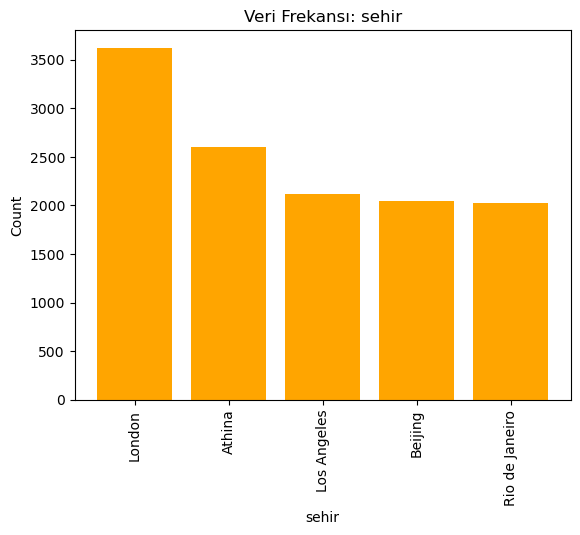

sehir Değişkeni: 
sehir
London            3624
Athina            2602
Los Angeles       2123
Beijing           2048
Rio de Janeiro    2023
Name: count, dtype: int64


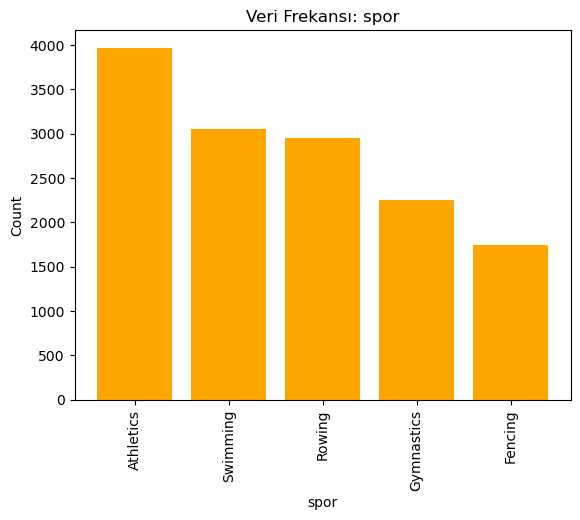

spor Değişkeni: 
spor
Athletics     3969
Swimming      3048
Rowing        2945
Gymnastics    2256
Fencing       1743
Name: count, dtype: int64


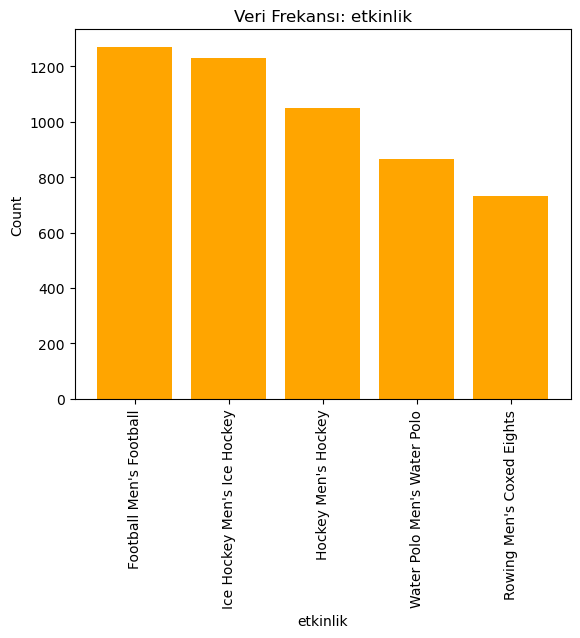

etkinlik Değişkeni: 
etkinlik
Football Men's Football        1269
Ice Hockey Men's Ice Hockey    1230
Hockey Men's Hockey            1050
Water Polo Men's Water Polo     866
Rowing Men's Coxed Eights       730
Name: count, dtype: int64


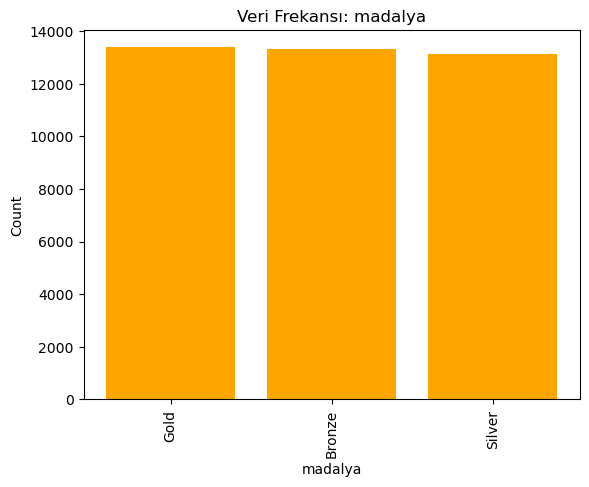

madalya Değişkeni: 
madalya
Gold      13372
Bronze    13295
Silver    13116
Name: count, dtype: int64


In [24]:
cat_cols = df.select_dtypes(include=["object"]).columns

def plotBar(degisken, n = 5):
    veri = df[degisken]
    veri_count = veri.value_counts()
    veri_count = veri_count[:n]

    plt.figure()
    plt.bar(veri_count.index, veri_count.values, color = "orange")
    plt.xlabel(degisken)
    plt.xticks(rotation = 90)
    plt.ylabel("Count")
    plt.title(f'Veri Frekansı: {degisken}')
    plt.show()
    print(f'{degisken} Değişkeni: \n{veri_count}')

for col in cat_cols:
    plotBar(col)

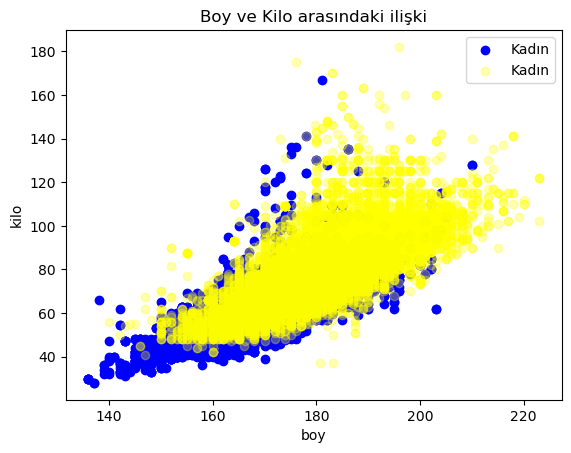

In [35]:
# İki değişkenli veri analizi
"""
Cinsiyete göre boy ve kilo karşılaştırılması
"""

erkek = df[df["cinsiyet"] == "M"]
kadin = df[df["cinsiyet"] == "F"]

plt.figure()
plt.scatter(kadin.boy, kadin.kilo, color = "blue", label = "Kadın")
plt.scatter(erkek.boy, erkek.kilo, color = "yellow", alpha = 0.3, label = "Kadın")
plt.xlabel("boy")
plt.ylabel("kilo")
plt.title("Boy ve Kilo arasındaki ilişki")
plt.legend()

In [37]:
num_corr = df.loc[:, ["yas", "boy", "kilo"]].corr()
num_corr

,yas,boy,kilo
yas,1.000000,0.067746,0.163132
boy,0.067746,1.000000,0.795365
kilo,0.163132,0.795365,1.000000


In [44]:
df2 = df.copy()
df2 = pd.get_dummies(df2, columns = ["madalya"])
num_corr2 = df2.loc[:, ["yas","madalya_Gold", "madalya_Silver"]].corr()
num_corr2

,yas,madalya_Gold,madalya_Silver
yas,1.000000,-0.002698,0.008590
madalya_Gold,-0.002698,1.000000,-0.499022
madalya_Silver,0.008590,-0.499022,1.000000


In [46]:
# Altın, gümüş ve bronz madalya sayılarının ülkelere göre gruplanması ve sıralanması
df2[["takim", "madalya_Gold", "madalya_Silver", "madalya_Bronze"]].groupby("takim").sum().sort_values(by = "madalya_Gold", ascending = False)

,madalya_Gold,madalya_Silver,madalya_Bronze
takim,,,
United States,2474,1512,1233
Soviet Union,1058,716,677
Germany,679,627,678
Italy,535,508,484
Great Britain,519,582,572
...,...,...,...
Kerstin-1,0,0,3
K Division Metropolitan Police Team-3,0,0,8
Joy,0,2,0


In [49]:
# Sovyet rusya ile rusyayı birleştirme
df2["takim"] = df2["takim"].replace("Soviet Union", "Russia")

In [51]:
# Altın, gümüş ve bronz madalya sayılarının ülkelere göre gruplanması ve sıralanması
df2[["takim", "madalya_Gold", "madalya_Silver", "madalya_Bronze"]].groupby("takim").sum().sort_values(by = "madalya_Gold", ascending = False)

,madalya_Gold,madalya_Silver,madalya_Bronze
takim,,,
United States,2474,1512,1233
Russia,1424,1067,1070
Germany,679,627,678
Italy,535,508,484
Great Britain,519,582,572
...,...,...,...
Kerstin-1,0,0,3
K Division Metropolitan Police Team-3,0,0,8
Joy,0,2,0


In [54]:
# Türkiye toplamda kaç adet madalya almış
df2[["takim", "madalya_Gold", "madalya_Silver", "madalya_Bronze"]].groupby("takim").sum().loc["Turkey"]

madalya_Gold      40
madalya_Silver    27
madalya_Bronze    28
Name: Turkey, dtype: int64

In [57]:
# Şehirlere göre kazanılan madalyaların toplamı
df2[["sehir", "madalya_Gold", "madalya_Silver", "madalya_Bronze"]].groupby("sehir").sum().sort_values(by = "madalya_Gold", ascending = False)

,madalya_Gold,madalya_Silver,madalya_Bronze
sehir,,,
London,1215,1195,1214
Athina,883,859,860
Los Angeles,726,691,706
Beijing,671,667,710
Rio de Janeiro,665,655,703
Sydney,663,661,680
Atlanta,608,605,629
Barcelona,559,549,604
Seoul,520,513,549


In [59]:
# Cinsiyete göre kazanılan madalyaların toplamı
df2[["cinsiyet", "madalya_Gold", "madalya_Silver", "madalya_Bronze"]].groupby("cinsiyet").sum().sort_values(by = "madalya_Gold", ascending = False)

,madalya_Gold,madalya_Silver,madalya_Bronze
cinsiyet,,,
M,9625,9381,9524
F,3747,3735,3771


In [64]:
# Madalya alan sporcuların cinsiyetlerine göre boy, kilo ve yaş ortalamaları
df.pivot_table(index="madalya", #Satır
               columns="cinsiyet", #Sütun
               values=["boy", "kilo", "yas"], #Değerler
               aggfunc={"boy": np.mean,
                        "kilo": np.median,
                        "yas": [np.min, np.max, np.std]}).T

madalya                   Bronze        Gold      Silver
            cinsiyet                                    
boy  mean   F         169.989008  170.429033  170.222771
            M         180.130340  180.470264  180.184822
kilo median F          62.000000   62.603132   62.000000
            M          76.578669   77.000000   77.000000
yas  amax   F          69.000000   63.000000   55.000000
            M          72.000000   64.000000   73.000000
     amin   F          12.000000   13.000000   11.000000
            M          10.000000   13.000000   13.000000
     std    F           5.333555    5.219766    5.263709
            M           5.900143    6.013326    6.129850

In [71]:
veri_pivot_takim = df2.pivot_table(index=["takim", "sehir"],
                                   columns=["cinsiyet", "sezon"],
                                   values=["madalya_Gold", "madalya_Silver", "madalya_Bronze"],
                                   aggfunc={
                                       "madalya_Gold": [np.sum],
                                       "madalya_Silver": [np.sum],
                                       "madalya_Bronze": [np.sum]
                                       })

veri_pivot_takim["total"] = (
    veri_pivot_takim["madalya_Gold"].sum(axis=1) +
    veri_pivot_takim["madalya_Silver"].sum(axis=1) +
    veri_pivot_takim["madalya_Bronze"].sum(axis=1)
)

veri_pivot_takim = veri_pivot_takim.sort_values(by="total", ascending=False)[:100]

veri_pivot_takim.to_excel("veri_pivot_takim.xlsx")